In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats

In [4]:
df = pd.read_csv(r"C:\Users\hp\Desktop\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv",encoding='ISO-8859-1')
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [5]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [13]:
df.shape

(11251, 15)

In [15]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [17]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [19]:
updated = df['Amount'].fillna(df['Amount'].mean())

In [21]:
updated.isnull().sum()

0

In [23]:
updated.info()

<class 'pandas.core.series.Series'>
RangeIndex: 11251 entries, 0 to 11250
Series name: Amount
Non-Null Count  Dtype  
--------------  -----  
11251 non-null  float64
dtypes: float64(1)
memory usage: 88.0 KB


In [25]:
df.dropna(axis = 1,inplace = False)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2
...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3


In [27]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [29]:
df = pd.read_csv(r"C:\Users\hp\Desktop\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv",encoding='ISO-8859-1')
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [31]:
df.drop(['Status'],axis = 1,inplace = False)


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN


In [33]:
df['Amount'].dtype

dtype('float64')

In [35]:
df['Amount'].isnull().sum()

12

In [37]:
up = df['Amount'].fillna(df['Amount'].mean(),inplace = True)

In [39]:
df['Amount'].isnull().sum()

0

In [41]:
df['Amount']= df['Amount'].astype('int')  # to change  datatype

In [43]:
df['Amount'].dtypes

dtype('int32')

In [45]:
df.rename(columns = {'Gender' : 'Sex'}, inplace = False)

,User_ID,Cust_name,Product_ID,Sex,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206,NaN,NaN


In [47]:
df['Gender'].value_counts()

Gender
F    7842
M    3409
Name: count, dtype: int64

In [49]:
df[['Orders','Age','Marital_Status','State']].describe(include = 'all')

,Orders,Age,Marital_Status,State
count,11251.000000,11251.000000,11251.000000,11251
unique,NaN,NaN,NaN,16
top,NaN,NaN,NaN,Uttar Pradesh
freq,NaN,NaN,NaN,1946
mean,2.489290,35.421207,0.420318,NaN
std,1.115047,12.754122,0.493632,NaN
min,1.000000,12.000000,0.000000,NaN
25%,1.500000,27.000000,0.000000,NaN
50%,2.000000,33.000000,0.000000,NaN
75%,3.000000,43.000000,1.000000,NaN


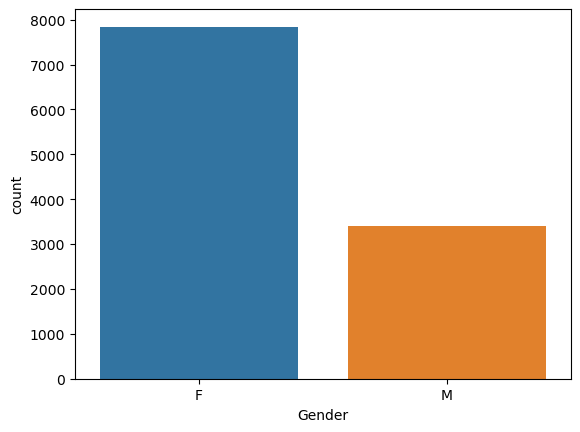

In [51]:
bar = sns.countplot(x= 'Gender',data = df)
 # only one variable can be passed in count plot

In [53]:
ds = df.groupby(['Gender'],as_index = False)[['Amount']].sum().sort_values(by = 'Amount')

In [55]:
ds
#

,Gender,Amount
1,M,31932182
0,F,74430383


<Axes: xlabel='Gender', ylabel='Amount'>

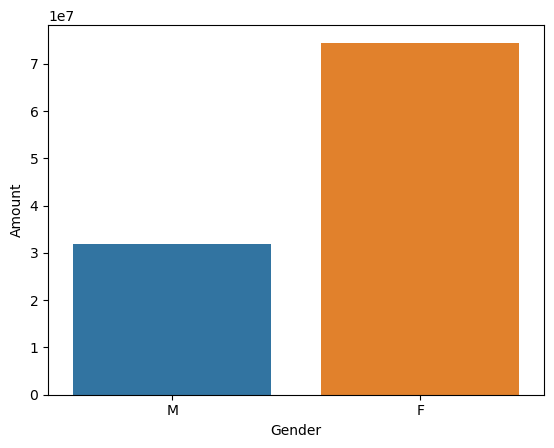

In [57]:
sns.barplot(x = 'Gender',y = 'Amount',data = ds)  # x variable should be numerical for barplot

In [59]:
df['Gender'].value_counts()

Gender
F    7842
M    3409
Name: count, dtype: int64

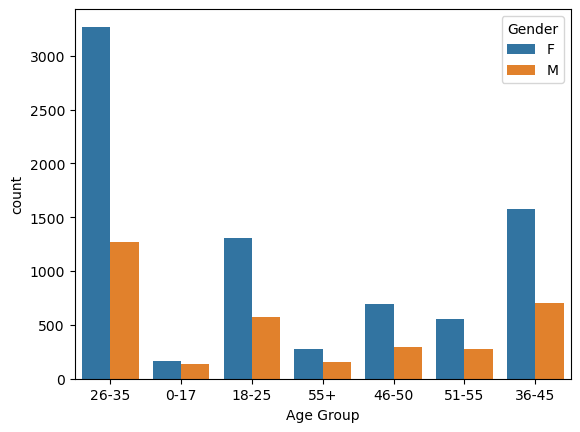

In [61]:
jar = sns.countplot(x = 'Age Group',data = df,hue = 'Gender') # hue to show varaition of both gender in each age group

In [63]:
gf = df.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by = 'Amount')

<Axes: xlabel='Age Group', ylabel='Amount'>

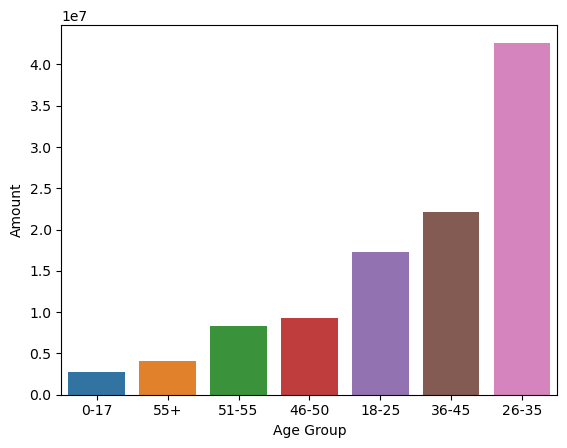

In [65]:
sns.barplot(x = 'Age Group',y = 'Amount',data = gf)

In [67]:
df['Age'].value_counts()

Age
30    522
26    494
28    460
29    454
31    448
     ... 
81      8
70      7
92      7
59      7
62      5
Name: count, Length: 81, dtype: int64

In [69]:
cs = df.groupby(['Age'])[['Amount']].sum().sort_values(by = 'Amount')

In [71]:
cs

,Amount
Age,
59,45101
62,54842
91,66715
57,68553
60,72321
...,...
29,4276587
28,4351575
35,4354269


In [73]:
df.sample(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
1432,1004277,Sanjay,P00190142,M,36-45,38,0,Maharashtra,Western,Banking,Footwear & Shoes,2,16348,NaN,NaN
4896,1002788,Pippenger,P00327542,F,55+,87,0,Uttar Pradesh,Central,Aviation,Clothing & Apparel,4,8797,NaN,NaN


In [75]:
df['State'].value_counts()

State
Uttar Pradesh       1946
Maharashtra         1526
Karnataka           1305
Delhi               1107
Madhya Pradesh       923
Andhra Pradesh       812
Himachal Pradesh     608
Kerala               453
Haryana              452
Bihar                434
Gujarat              429
Jharkhand            380
Uttarakhand          320
Rajasthan            231
Punjab               200
Telangana            125
Name: count, dtype: int64

In [162]:
s=df.groupby(['State'],as_index = False)[['Orders']].sum().sort_values(by='Orders').head(8)


In [164]:
s

,State,Orders
13,Telangana,312
11,Punjab,495
12,Rajasthan,555
15,Uttarakhand,824
6,Jharkhand,953
1,Bihar,1062
3,Gujarat,1070
4,Haryana,1109


<Axes: xlabel='State', ylabel='Orders'>

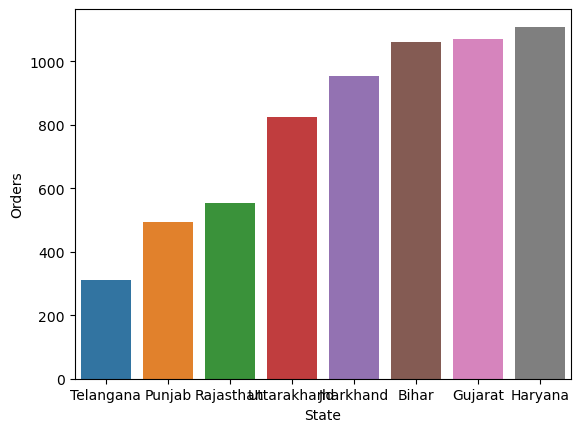

In [166]:
sns.barplot( data= s,x = 'State',y = 'Orders')

In [168]:
gh=df.groupby(['State'],as_index = False)[['Amount']].sum().sort_values(by='Amount').head(8)

In [170]:
gh

,State,Amount
13,Telangana,1151490
11,Punjab,1525800
12,Rajasthan,1909409
15,Uttarakhand,2520944
6,Jharkhand,3026456
8,Kerala,3894491
3,Gujarat,3964988
1,Bihar,4022757


<Axes: xlabel='State', ylabel='Amount'>

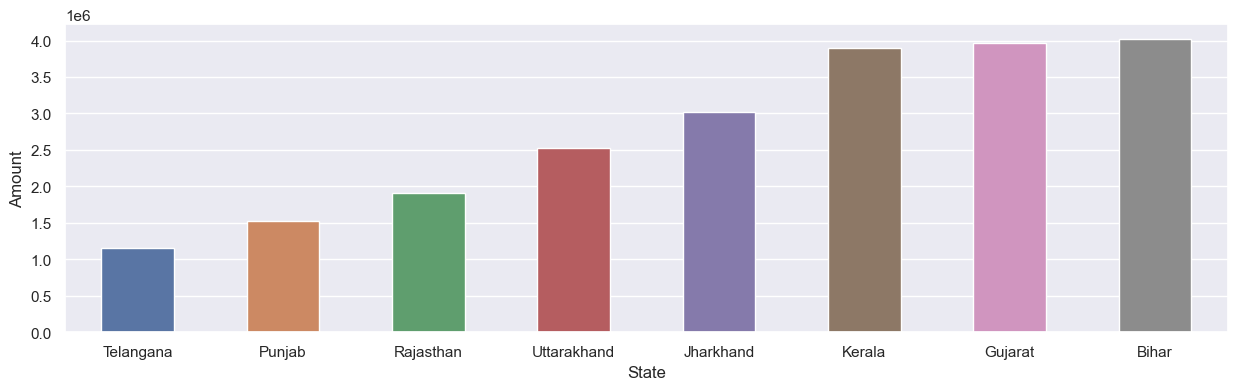

In [254]:
sns.set(rc={'figure.figsize':(15,4)})
sns.barplot(data = gh, x = 'State', y = 'Amount',width = 0.5)

In [174]:
df['State']

0           Maharashtra
1        Andhra Pradesh
2         Uttar Pradesh
3             Karnataka
4               Gujarat
              ...      
11246       Maharashtra
11247           Haryana
11248    Madhya Pradesh
11249         Karnataka
11250       Maharashtra
Name: State, Length: 11251, dtype: object

In [176]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206,NaN,NaN


<Axes: xlabel='Marital_Status', ylabel='count'>

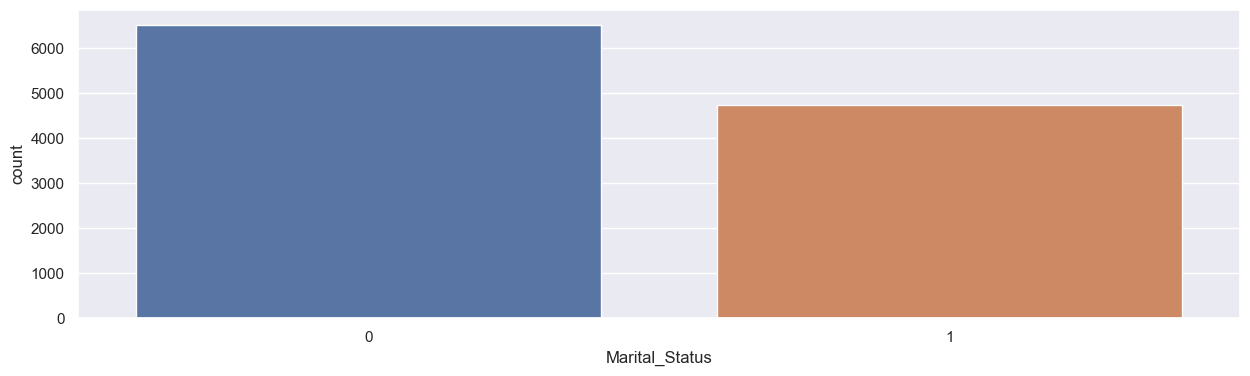

In [265]:
 sns.countplot(x='Marital_Status', data = df )

In [184]:
dt = df.groupby(['Marital_Status', 'Gender']as_index = False)[['Amount']].sum().sort_values(by = 'Amount')

In [182]:
dt

,,Amount
Marital_Status,Gender,
1,M,13583991
0,M,18348191
1,F,30615378
0,F,43815005


<Axes: xlabel='Marital_Status', ylabel='Amount'>

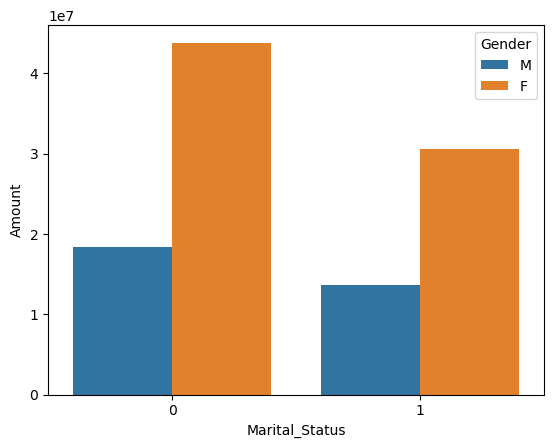

In [188]:
sns.barplot(x = 'Marital_Status', y = 'Amount', hue = 'Gender',data = dt)


In [192]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934,NaN,NaN


<Axes: xlabel='Occupation', ylabel='count'>

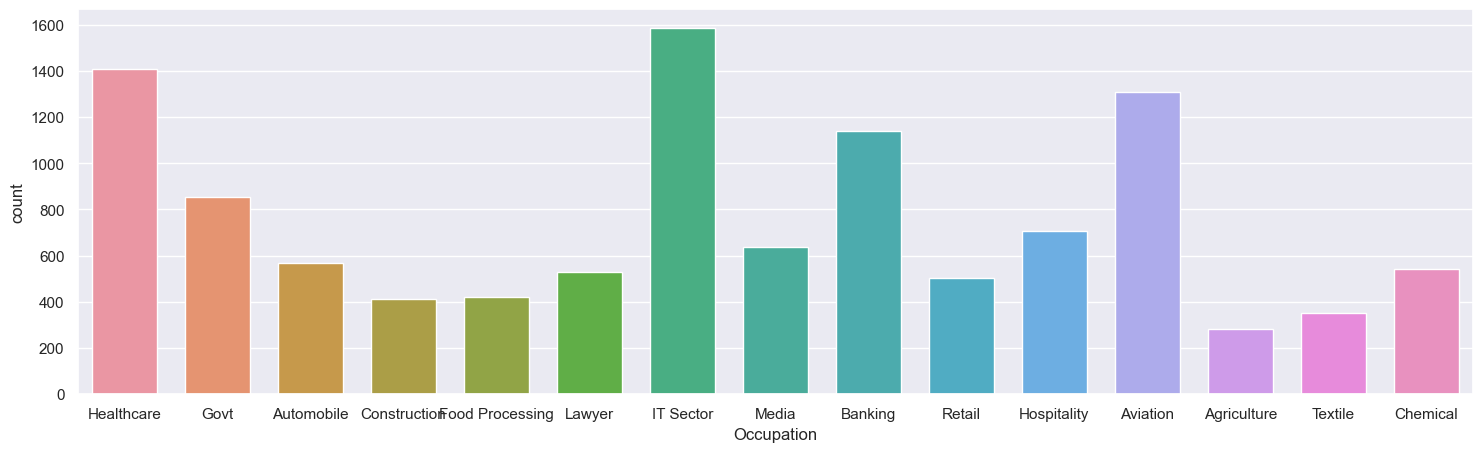

In [222]:
sns.set(rc = {'figure.figsize':(18,5)})
sns.countplot(x = 'Occupation',data = df,width=0.7)

In [236]:
gf = df.groupby(['Occupation','Gender'],as_index = False)[['Orders']].sum().sort_values(by = 'Orders', ascending = False)
gf

,Occupation,Gender,Orders
20,IT Sector,F,2701
16,Healthcare,F,2403
4,Aviation,F,2302
6,Banking,F,2034
14,Govt,F,1507
21,IT Sector,M,1309
18,Hospitality,F,1183
24,Media,F,1069
17,Healthcare,M,1052
26,Retail,F,958


<Axes: xlabel='Occupation', ylabel='Orders'>

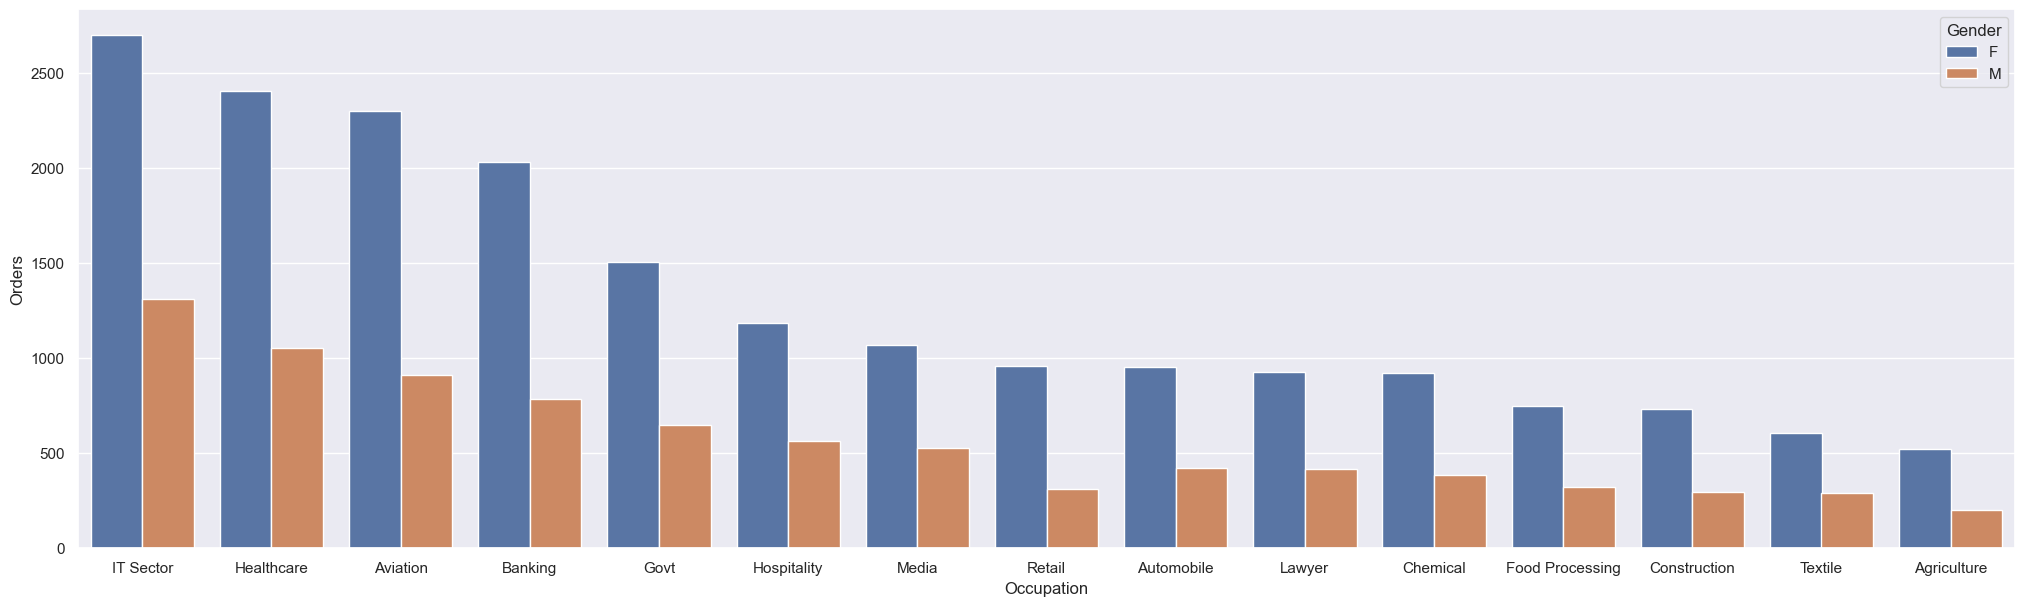

In [246]:
sns.set(rc = {'figure.figsize':(25,7)})
sns.barplot(x = 'Occupation',y = 'Orders',hue = 'Gender', data = gf)

<Axes: xlabel='Product_Category', ylabel='count'>

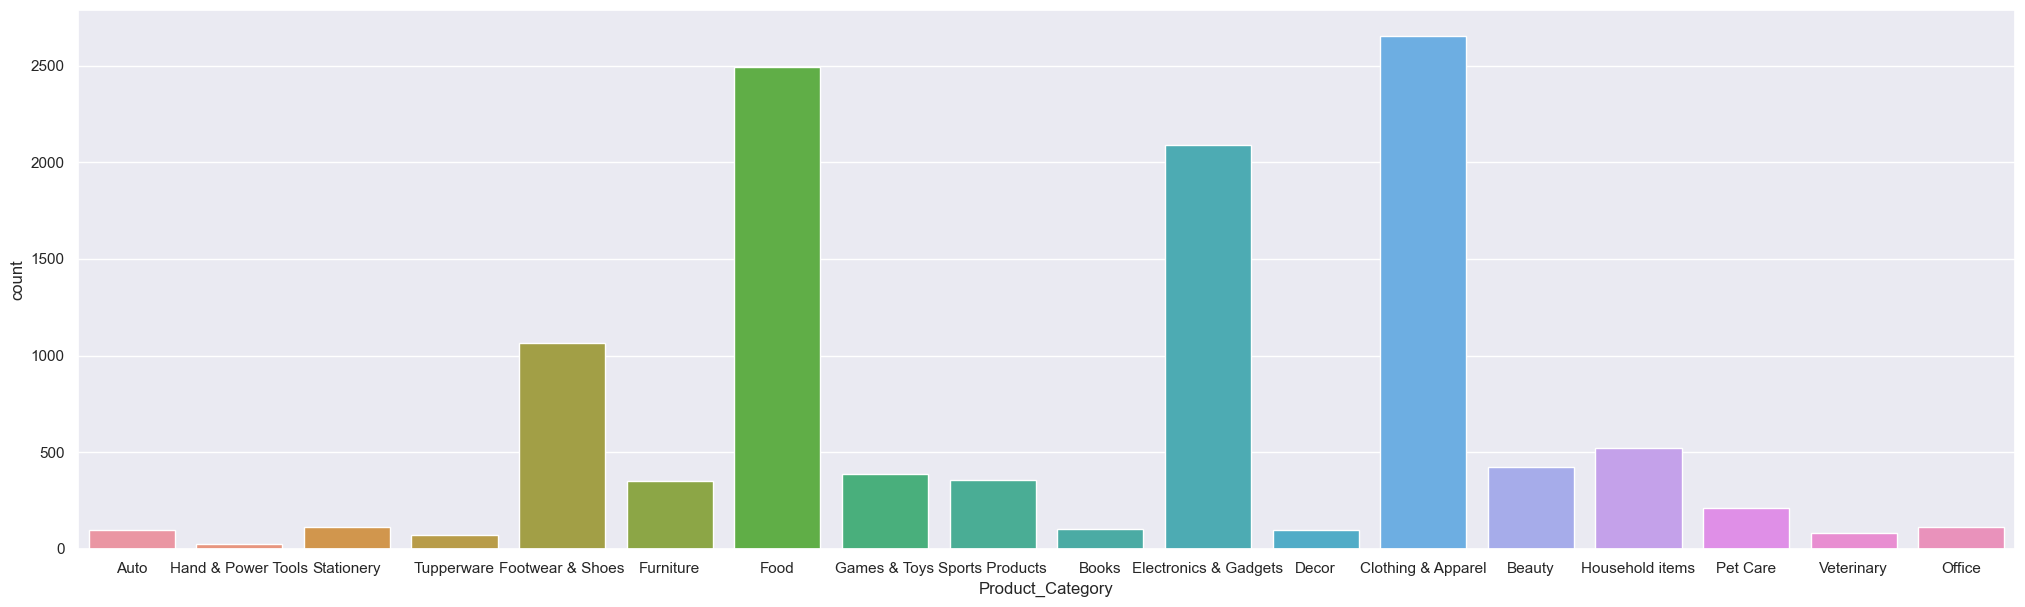

In [269]:
sns.set(rc = {'figure.figsize':(25,7)})
sns.countplot(x = 'Product_Category', data = df)

In [283]:
fd = df.groupby(['Product_Category','Gender'], as_index = False)[['Amount']].sum().sort_values(by = 'Amount').head(10)
fd

,Product_Category,Gender,Amount
35,Veterinary,M,22466
25,Office,M,26953
24,Office,F,54983
34,Veterinary,F,90236
20,Hand & Power Tools,F,127100
9,Decor,M,133366
27,Pet Care,M,150768
21,Hand & Power Tools,M,278518
33,Tupperware,M,324677
26,Pet Care,F,331509


<Axes: xlabel='Product_Category', ylabel='Amount'>

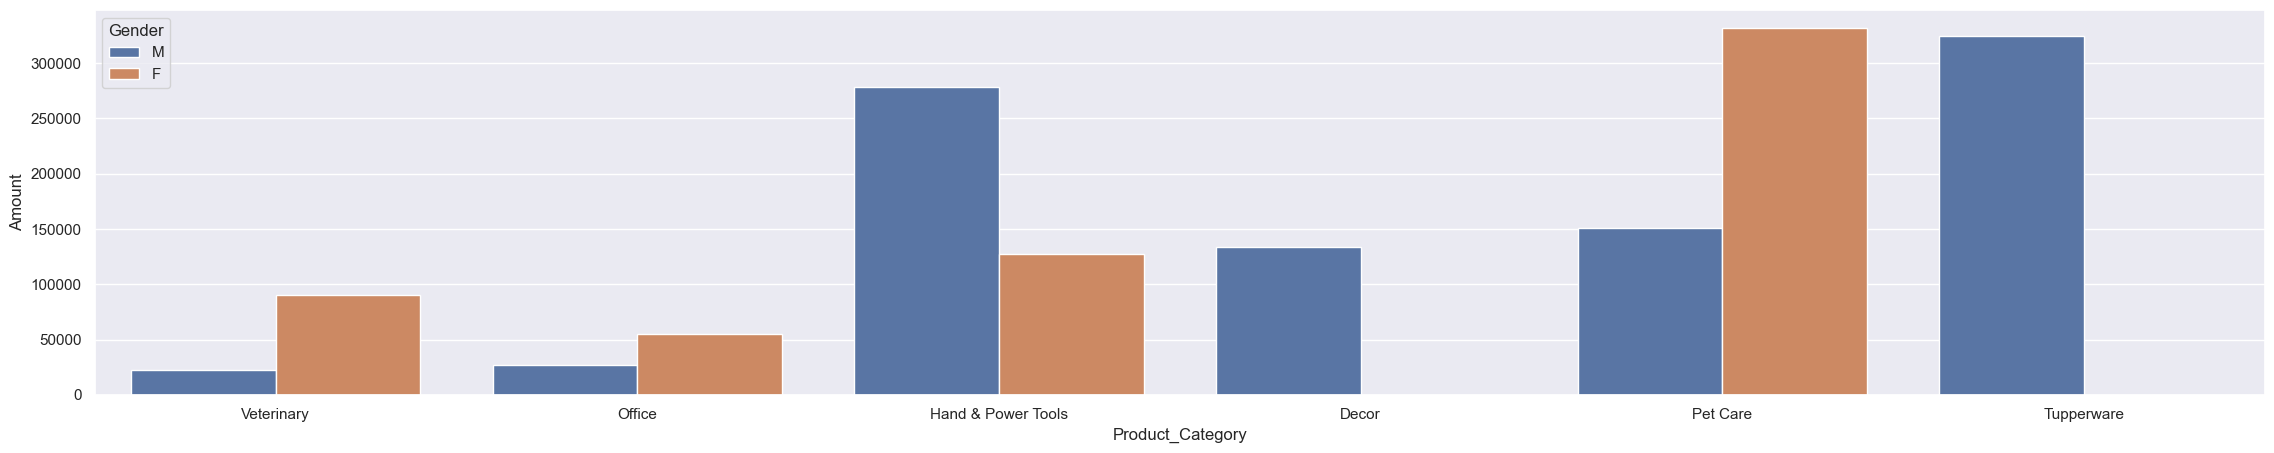

In [293]:
sns.set(rc = {'figure.figsize':(28,5)})
sns.barplot(x = 'Product_Category',y = 'Amount',hue = 'Gender', data = fd)


In [306]:
fg = df.groupby(['Product_ID','Gender'], as_index = False)[['Amount']].sum().sort_values(by = 'Amount', ascending = False).head(10)
fg

,Product_ID,Gender,Amount
2560,P00265242,F,429460
1752,P00184942,F,325266
963,P00110942,F,318433
959,P00110742,F,264745
961,P00110842,F,257314
590,P00059442,F,246089
2304,P00237542,F,240103
448,P00044442,F,231273
260,P00025442,F,221175
1359,P00145042,F,207892


<Axes: xlabel='Product_ID', ylabel='Amount'>

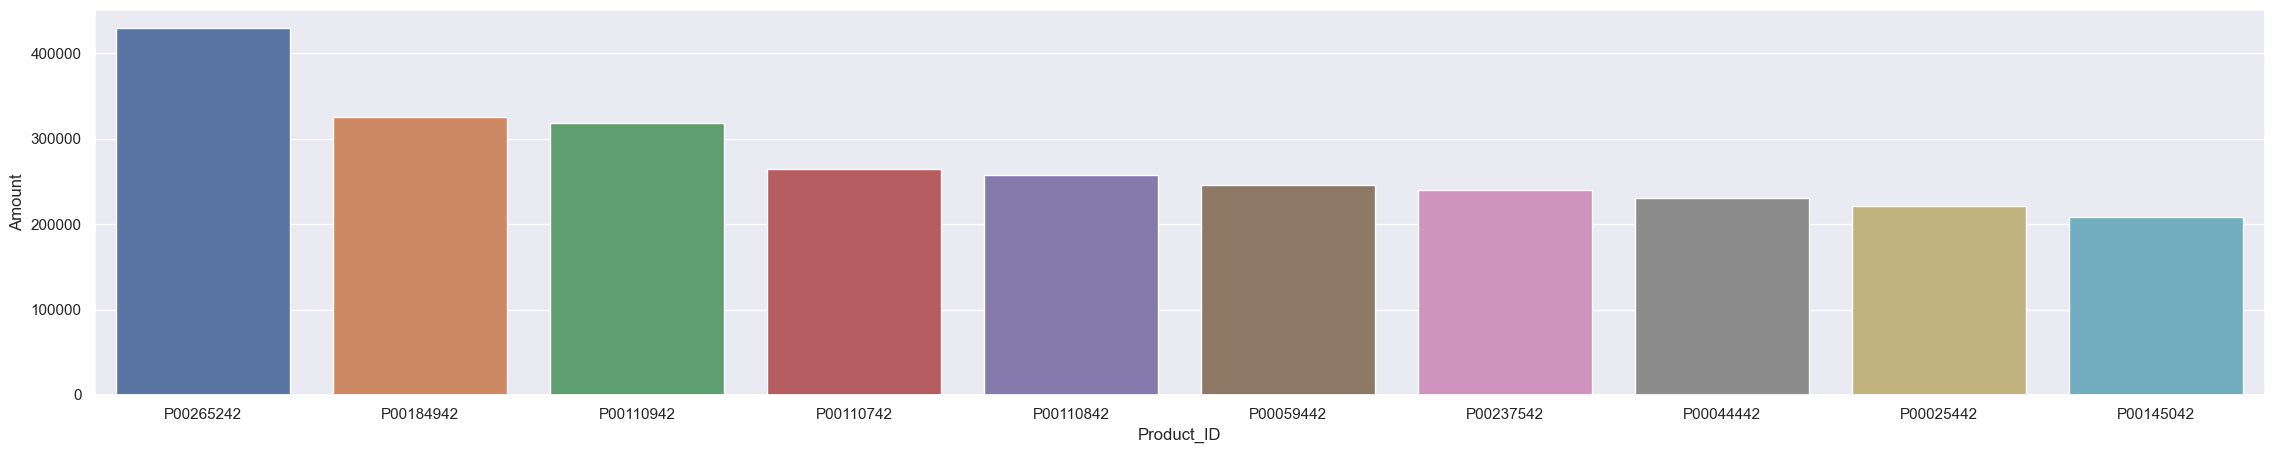

In [310]:
sns.set(rc = {'figure.figsize':(28,5)})
sns.barplot(x = 'Product_ID',y = 'Amount', data = fg)


****************************************************************CONCLUSION****************************************************************

Married women age group 26-35 yrs from UP , Maharashtra and Karnataka working in IT, healthcareand aviation are more likely to buy product from food clothing and electronics category